In [1]:
import numpy as np 
import pandas as pd
import os
import gzip
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
parent_dir = "../analytic/"
csv_files = []
for data_dir in os.listdir(parent_dir):
    for file in os.listdir(parent_dir + data_dir):
        if file.endswith(".csv"):
            csv_files.append(parent_dir + data_dir+'/'+file)
print(csv_files)

['../analytic/graph_lj_nve/graph_lj_nve.csv', '../analytic/graph_nve/graph_nve.csv', '../analytic/graph_nve_100/graph_nve_100.csv', '../analytic/graph_nve_4.14/graph_nve_4.14.csv']


graph_lj_nve
temperature (K)
Mean:  305.2563318199997 305.2563318199997
Standard Deviation:  2.0798112540991847 2.0798112540991847
Standard Error:  0.04650599344534865 0.04650599344534865
watertemperature (K)
Mean:  305.9709585950003 305.9709585950003
Standard Deviation:  2.11439788205879 2.11439788205879
Standard Error:  0.04727937395765037 0.04727937395765037
pressure (ATM)
Mean:  333.5621132449998 333.5621132449998
Standard Deviation:  49.48708152190031 49.48708152190031
Standard Error:  1.1065647829104284 1.1065647829104284
waterpressure (ATM)
Mean:  -161.96933308741689 -161.96933308741689
Standard Deviation:  155.04366561733002 155.04366561733002
Standard Error:  3.466881758010968 3.466881758010968
density (g/cm$^3$)
Mean:  0.9501878755100014 0.9501878755100014
Standard Deviation:  0.0030722383167109896 0.0030722383167109896
Standard Error:  6.8697337192453e-05 6.8697337192453e-05
vorovol (ang$^3$)
Mean:  224800.06085500005 224800.06085500005
Standard Deviation:  727.0056628506597

C:\Users\rvick\miniconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


density (g/cm$^3$)
Mean:  0.9519423493399995 0.9519423493399995
Standard Deviation:  0.0029504446264749843 0.0029504446264749843
Standard Error:  6.59739474864704e-05 6.59739474864704e-05
vorovol (ang$^3$)
Mean:  224385.55340000027 224385.55340000027
Standard Deviation:  695.5360809128929 695.5360809128929
Standard Error:  15.552659577250225 15.552659577250225
graph_nve_100
temperature (K)
Mean:  283.52001289499964 283.52001289499964
Standard Deviation:  1.9529036093951122 1.9529036093951122
Standard Error:  0.043668252241121676 0.043668252241121676
watertemperature (K)
Mean:  305.7453780849998 305.7453780849998
Standard Deviation:  2.1059516883596894 2.1059516883596894
Standard Error:  0.04709051132502718 0.04709051132502718
pressure (ATM)
Mean:  -48.93861650527346 -48.93861650527346
Standard Deviation:  48.0048507735517 48.0048507735517
Standard Error:  1.0734210957939496 1.0734210957939496
waterpressure (ATM)
Mean:  -60.25229692689004 -60.25229692689004
Standard Deviation:  154.3643

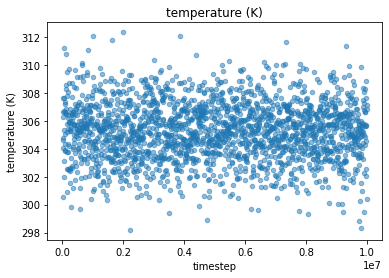

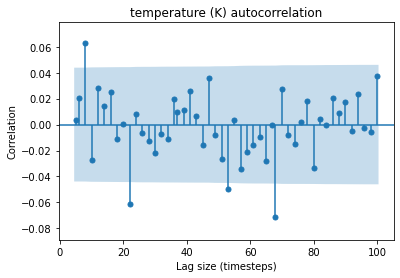

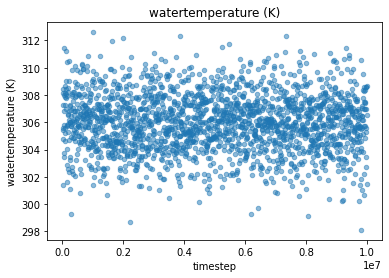

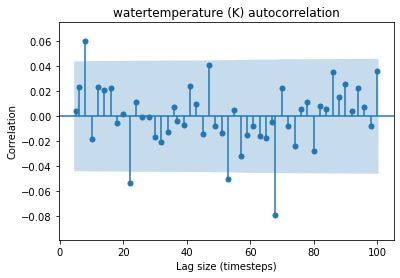

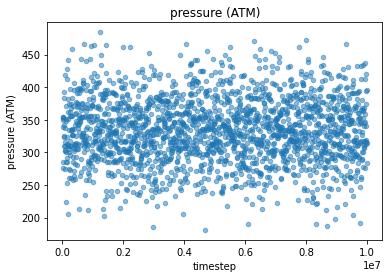

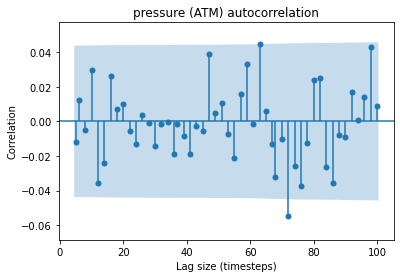

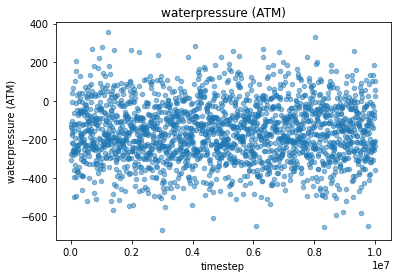

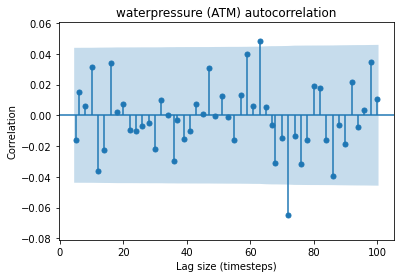

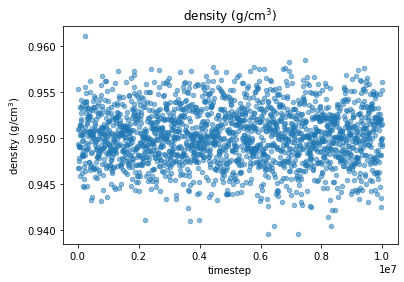

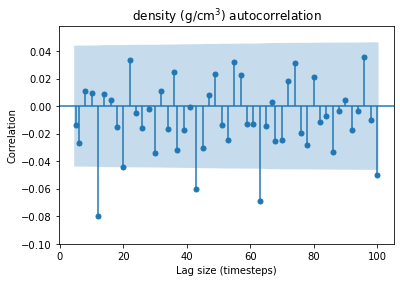

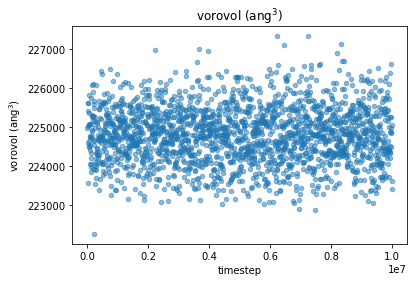

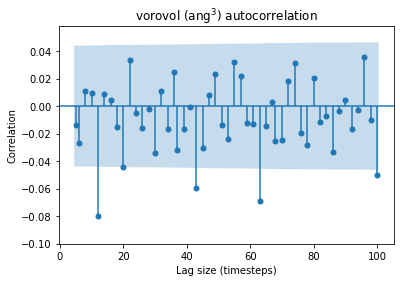

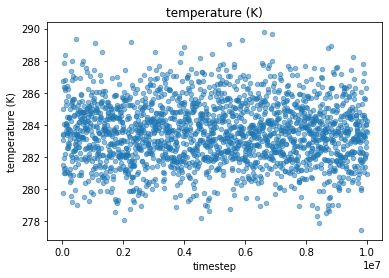

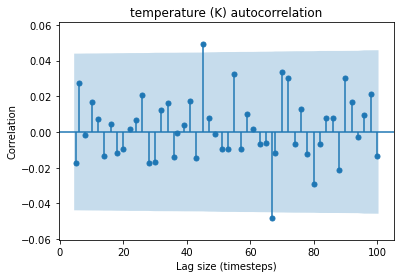

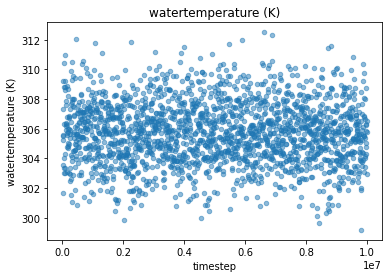

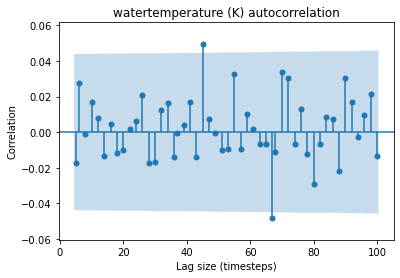

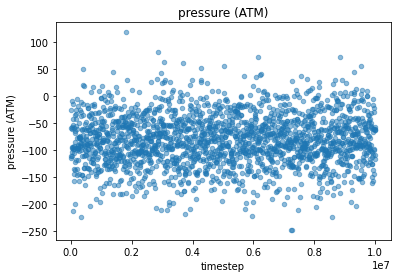

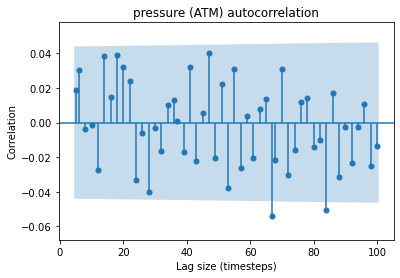

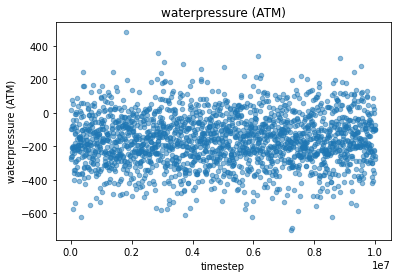

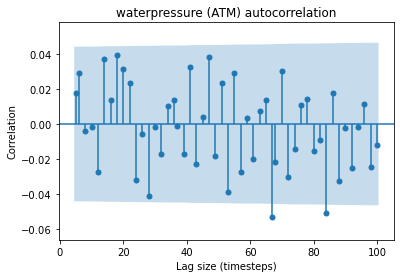

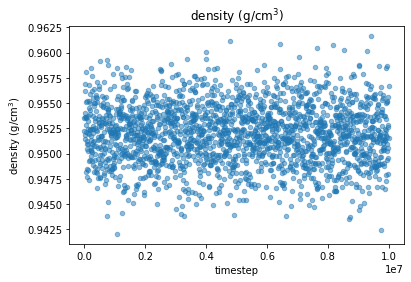

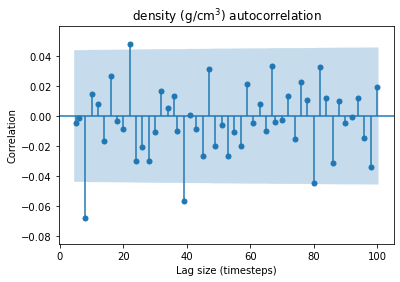

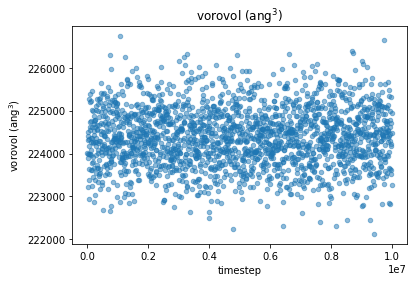

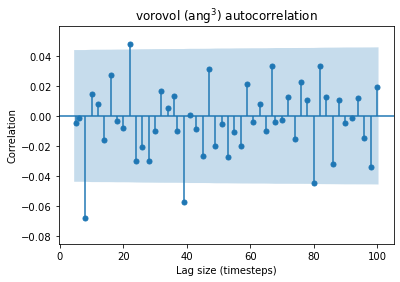

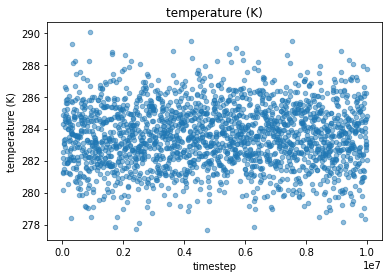

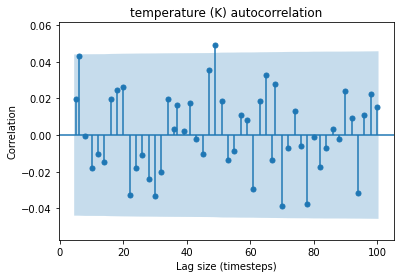

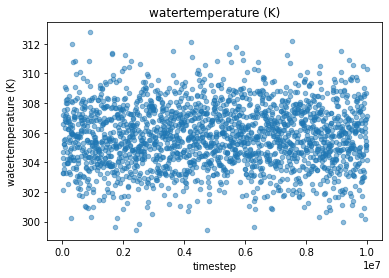

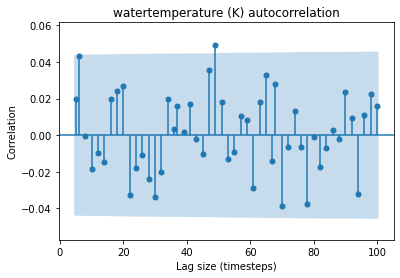

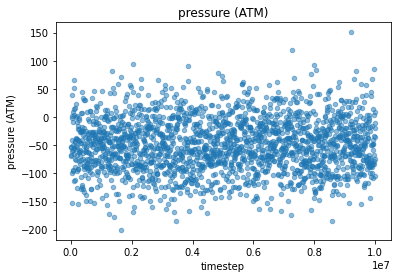

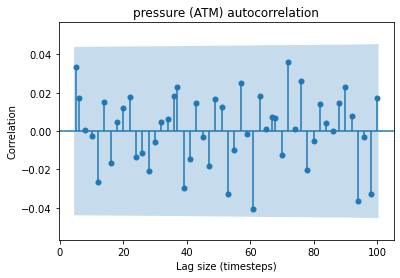

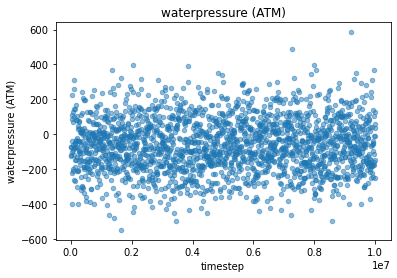

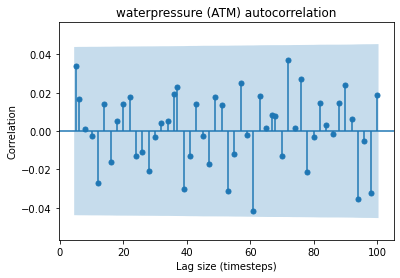

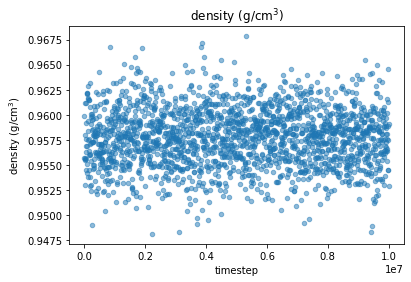

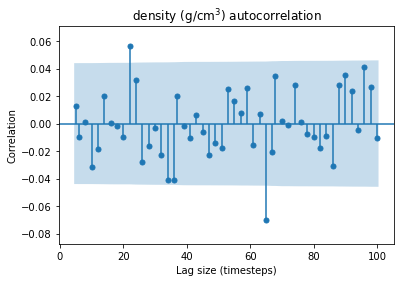

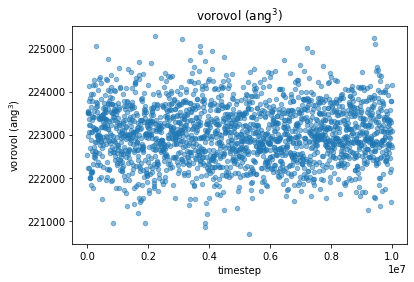

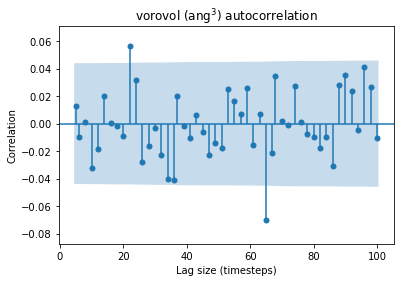

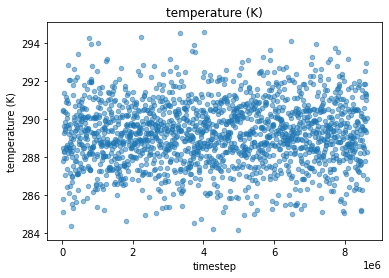

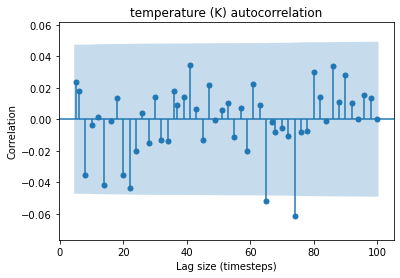

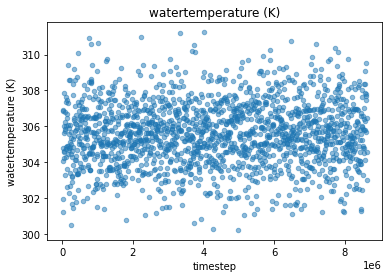

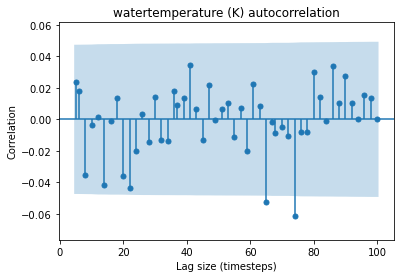

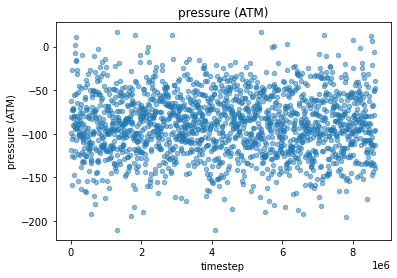

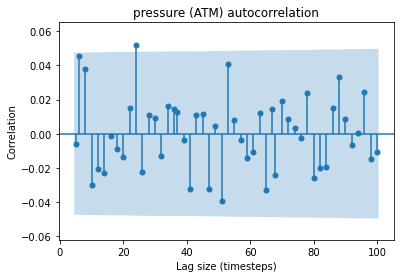

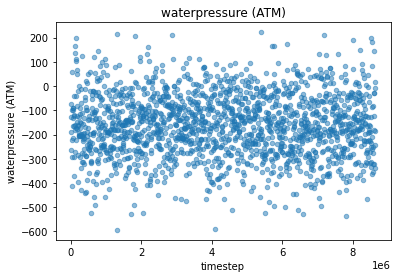

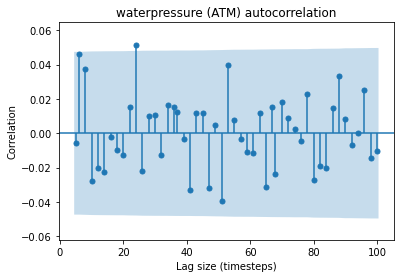

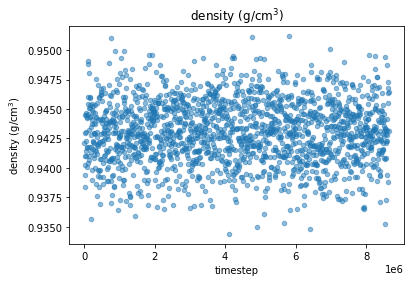

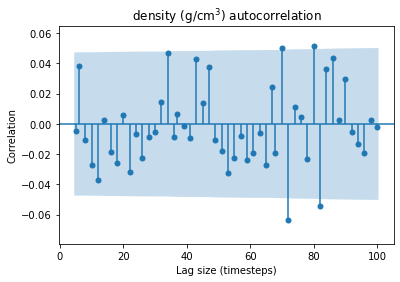

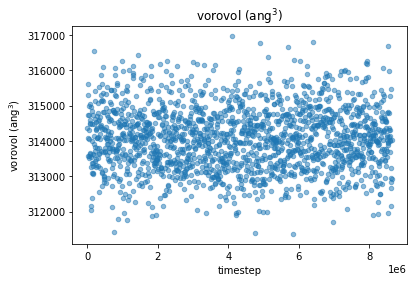

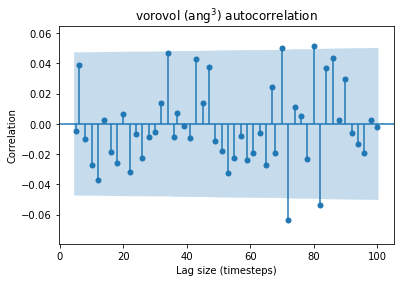

In [4]:
for csv in csv_files:
    domain = csv.split('/')[-1].split('.')[0]
    if csv == '../tip3pst/npt1/npt1.csv':
        df = pd.read_csv(csv,header=None,names=('timestep','temperature (K)','lx','ly','lz','pressure (ATM)','density (g/cm$^3$)'))
        continue
    elif csv == '../tip3pst/nvt_piston/nvt_piston.csv':
        df = pd.read_csv(csv,header=None,names=('timestep','temperature (K)','pressure (ATM)', 'lowallpressure (ATM)','hiwallpressure (ATM)','totalpressure (ATM)','waterpressure (ATM)'))
        df = df.iloc[11971:]
    elif csv == '../tip3pst/nvt_piston_low_eps/nvt_piston_loweps.csv':
        df = pd.read_csv(csv,header=None,names=('timestep','temperature (K)','pressure (ATM)','lowallpressure (ATM)','hiwallpressure (ATM)','totalpressure (ATM)','waterpressure (ATM)'))
        df = df.iloc[4991:]
    elif csv == '../tip3pst/nvt_reflect/nvt_reflect.csv':
        df = pd.read_csv(csv,header=None,names=('timestep','temperature (K)','pressure (ATM)','epair (Kcal/mole)','emol (Kcal/mole)','etotal (Kcal/mole)','density (g/cm$^3$)'))
        df = df.iloc[1971:]
    elif csv == '../fb/water_pump/water_pump.csv':
        df = pd.read_csv(csv,header=None,names=('timestep','temperature (K)','pressure (ATM)','etotal (Kcal/mole)'))
        continue
    elif csv == '../fb/move_wall/move_wall.csv':
        df = pd.read_csv(csv,header=None,names=('timestep','temperature (K)','watertemperature (K)','pressure (ATM)', 'waterpressure (ATM)', 'checkpressure (ATM)', 'lowallpressure (ATM)', 'hiwallpressure (ATM)'))
        continue
    elif csv == '../fb/nve_wall/nve_wall.csv':
        df = pd.read_csv(csv,header=None,names=('timestep','temperature (K)','watertemperature (K)','pressure (ATM)', 'waterpressure (ATM)', 'checkpressure (ATM)', 'lowallpressure (ATM)', 'hiwallpressure (ATM)'))
    elif csv == '../analytic/graph_nve_100/graph_nve_100.csv':
        df = pd.read_csv(csv,header=None,names=('timestep','temperature (K)','watertemperature (K)','pressure (ATM)', 'waterpressure (ATM)', 'density (g/cm$^3$)', 'vorovol (ang$^3$)'))
    elif csv == '../analytic/graph_nve/graph_nve.csv':
        df = pd.read_csv(csv,header=None,names=('timestep','temperature (K)','watertemperature (K)','pressure (ATM)', 'waterpressure (ATM)', 'density (g/cm$^3$)', 'vorovol (ang$^3$)'))
    elif csv == '../analytic/graph_nve_4.14/graph_nve_4.14.csv':
        df = pd.read_csv(csv,header=None,names=('timestep','temperature (K)','watertemperature (K)','pressure (ATM)', 'waterpressure (ATM)', 'density (g/cm$^3$)', 'vorovol (ang$^3$)'))
    elif csv == '../analytic/graph_lj_nve/graph_lj_nve.csv':
        df = pd.read_csv(csv,header=None,names=('timestep','temperature (K)','watertemperature (K)','pressure (ATM)', 'waterpressure (ATM)', 'density (g/cm$^3$)', 'vorovol (ang$^3$)'))
    print(domain)
    for i in df.columns:
        if i == 'timestep':
            continue
        elif i == 'emol (Kcal/mole)':
            continue
        data1 = df[['timestep',i]]
        data = df[i]
        data1.plot(x='timestep', y=i, kind='scatter', alpha = 0.5, title=i)
        plt.savefig('../plots/'+domain+i.split(' ')[0]+'.png',bbox_inches='tight',facecolor='auto',transparent=False)
        plot_acf(data,lags=np.linspace(5,100),alpha=0.05,zero=False,auto_ylims=True,title=i+' autocorrelation')
        plt.xlabel('Lag size (timesteps)')
        plt.ylabel('Correlation')
        plt.savefig('../plots/'+domain+i.split(' ')[0]+'_autocorrel.png',bbox_inches='tight',facecolor='auto',transparent=False)
        print(i)
        print('Mean: ', df[i].mean(), df[i].iloc[::1].mean())
        print('Standard Deviation: ', df[i].std(), df[i].iloc[::1].std())
        print('Standard Error: ', df[i].sem(), df[i].iloc[::1].sem())